In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing source code
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.utils as utils
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

In [4]:
network = utils.metabolicNetwork.FromGeneList('ECOLI', ['lacZ', 'lacA', 'lacY'], fmt = 'complex')
network

,GENE OR COMPLEX,REACTION,SUBSTRATES,PRODUCTS,FWD_RATE,RVS_RATE
0,"[lacZ,lacZ,lacZ,lacZ]",BETAGALACTOSID-RXN,"CPD-15972,WATER","GALACTOSE,Glucopyranose",1.0,1.0
1,"[lacZ,lacZ,lacZ,lacZ]",RXN0-5363,Alpha-lactose,ALLOLACTOSE,1.0,1.0
2,"[lacZ,lacZ,lacZ,lacZ]",RXN-17726,"CPD-3561,WATER","GALACTOSE,Fructofuranose",1.0,1.0
3,"[lacZ,lacZ,lacZ,lacZ]",RXN0-7219,"CPD-3785,WATER","GALACTOSE,D-ARABINOSE",1.0,1.0
4,"[lacA,lacA,lacA]",GALACTOACETYLTRAN-RXN,"Beta-D-Galactosides,ACETYL-COA","6-Acetyl-Beta-D-Galactosides,CO-A",1.0,1.0
5,lacY,TRANS-RXN-24,"PROTON,Alpha-lactose","PROTON,Alpha-lactose",1.0,1.0
6,lacY,TRANS-RXN-94,"PROTON,MELIBIOSE","PROTON,MELIBIOSE",1.0,1.0
7,lacY,RXN0-7215,"PROTON,CPD-3561","PROTON,CPD-3561",1.0,1.0
8,lacY,RXN0-7217,"PROTON,CPD-3785","PROTON,CPD-3785",1.0,1.0
9,lacY,RXN-17755,"PROTON,CPD-3801","PROTON,CPD-3801",1.0,1.0


In [5]:
network = utils.metabolicNetwork.setIrreversibility(network, geneLst = ['[lacZ,lacZ,lacZ,lacZ]', 'lacY'])
network

,GENE OR COMPLEX,REACTION,SUBSTRATES,PRODUCTS,FWD_RATE,RVS_RATE
0,"[lacZ,lacZ,lacZ,lacZ]",BETAGALACTOSID-RXN,"CPD-15972,WATER","GALACTOSE,Glucopyranose",1.0,0.0
1,"[lacZ,lacZ,lacZ,lacZ]",RXN0-5363,Alpha-lactose,ALLOLACTOSE,1.0,0.0
2,"[lacZ,lacZ,lacZ,lacZ]",RXN-17726,"CPD-3561,WATER","GALACTOSE,Fructofuranose",1.0,0.0
3,"[lacZ,lacZ,lacZ,lacZ]",RXN0-7219,"CPD-3785,WATER","GALACTOSE,D-ARABINOSE",1.0,0.0
4,"[lacA,lacA,lacA]",GALACTOACETYLTRAN-RXN,"Beta-D-Galactosides,ACETYL-COA","6-Acetyl-Beta-D-Galactosides,CO-A",1.0,1.0
5,lacY,TRANS-RXN-24,"PROTON,Alpha-lactose","PROTON,Alpha-lactose",1.0,0.0
6,lacY,TRANS-RXN-94,"PROTON,MELIBIOSE","PROTON,MELIBIOSE",1.0,0.0
7,lacY,RXN0-7215,"PROTON,CPD-3561","PROTON,CPD-3561",1.0,0.0
8,lacY,RXN0-7217,"PROTON,CPD-3785","PROTON,CPD-3785",1.0,0.0
9,lacY,RXN-17755,"PROTON,CPD-3801","PROTON,CPD-3801",1.0,0.0


In [6]:
network = utils.metabolicNetwork.setCompartment(network, geneLst = ['lacY'], compartmentLst = ['MEM'])
network

,GENE OR COMPLEX,REACTION,SUBSTRATES,PRODUCTS,FWD_RATE,RVS_RATE
0,"[lacZ,lacZ,lacZ,lacZ]",BETAGALACTOSID-RXN,"CPD-15972,WATER","GALACTOSE,Glucopyranose",1.0,0.0
1,"[lacZ,lacZ,lacZ,lacZ]",RXN0-5363,Alpha-lactose,ALLOLACTOSE,1.0,0.0
2,"[lacZ,lacZ,lacZ,lacZ]",RXN-17726,"CPD-3561,WATER","GALACTOSE,Fructofuranose",1.0,0.0
3,"[lacZ,lacZ,lacZ,lacZ]",RXN0-7219,"CPD-3785,WATER","GALACTOSE,D-ARABINOSE",1.0,0.0
4,"[lacA,lacA,lacA]",GALACTOACETYLTRAN-RXN,"Beta-D-Galactosides,ACETYL-COA","6-Acetyl-Beta-D-Galactosides,CO-A",1.0,1.0
5,MEM-lacY,TRANS-RXN-24,"PROTON,Alpha-lactose","PROTON,Alpha-lactose",1.0,0.0
6,MEM-lacY,TRANS-RXN-94,"PROTON,MELIBIOSE","PROTON,MELIBIOSE",1.0,0.0
7,MEM-lacY,RXN0-7215,"PROTON,CPD-3561","PROTON,CPD-3561",1.0,0.0
8,MEM-lacY,RXN0-7217,"PROTON,CPD-3785","PROTON,CPD-3785",1.0,0.0
9,MEM-lacY,RXN-17755,"PROTON,CPD-3801","PROTON,CPD-3801",1.0,0.0


In [7]:
network = utils.metabolicNetwork.setTransport(network, geneLst = ['MEM-lacY'], fromLst = ['PER'])
network

,GENE OR COMPLEX,REACTION,SUBSTRATES,PRODUCTS,FWD_RATE,RVS_RATE
0,"[lacZ,lacZ,lacZ,lacZ]",BETAGALACTOSID-RXN,"CPD-15972,WATER","GALACTOSE,Glucopyranose",1.0,0.0
1,"[lacZ,lacZ,lacZ,lacZ]",RXN0-5363,Alpha-lactose,ALLOLACTOSE,1.0,0.0
2,"[lacZ,lacZ,lacZ,lacZ]",RXN-17726,"CPD-3561,WATER","GALACTOSE,Fructofuranose",1.0,0.0
3,"[lacZ,lacZ,lacZ,lacZ]",RXN0-7219,"CPD-3785,WATER","GALACTOSE,D-ARABINOSE",1.0,0.0
4,"[lacA,lacA,lacA]",GALACTOACETYLTRAN-RXN,"Beta-D-Galactosides,ACETYL-COA","6-Acetyl-Beta-D-Galactosides,CO-A",1.0,1.0
5,MEM-lacY,TRANS-RXN-24,"PER-PROTON,PER-Alpha-lactose","PROTON,Alpha-lactose",1.0,0.0
6,MEM-lacY,TRANS-RXN-94,"PER-PROTON,PER-MELIBIOSE","PROTON,MELIBIOSE",1.0,0.0
7,MEM-lacY,RXN0-7215,"PER-PROTON,PER-CPD-3561","PROTON,CPD-3561",1.0,0.0
8,MEM-lacY,RXN0-7217,"PER-PROTON,PER-CPD-3785","PROTON,CPD-3785",1.0,0.0
9,MEM-lacY,RXN-17755,"PER-PROTON,PER-CPD-3801","PROTON,CPD-3801",1.0,0.0


In [8]:
utils.metabolicNetwork.expand_network(network, 'tutorial.txt')
# Reaction nodes: 0 170 80 #00AA50
# Metabolites: 0 171 221 #00ABDD
# Gene products: 204 0 51 #CC0033

In [9]:
model = atlas.construct_model_from_metabolic_network(network, verbose = False)

In [10]:
# model initial condition
simulation.set_initial.met(model, 'Alpha_lactose', 'per', 100)
simulation.set_initial.met(model, 'PROTON', 'per', 100)
simulation.set_initial.met(model, 'WATER', 'cyt', 100)

# if 'network1' in network:
simulation.set_initial.cplx(model, 'BETAGALACTOSID_CPLX', 'cyt', 1)
simulation.set_initial.cplx(model, 'GALACTOACETYLTRAN_CPLX', 'cyt', 1)
simulation.set_initial.prot(model, 'LACY_MONOMER', 'mem', 1)

# if 'network2' in network:
simulation.set_initial.prot(model, 'lacZ', 'cyt', 1)
simulation.set_initial.prot(model, 'lacA', 'cyt', 1)
simulation.set_initial.prot(model, 'lacY', 'mem', 1)

# if 'network3' in network:
simulation.set_initial.prot(model, 'lacY', 'mem', 1)
simulation.set_initial.cplx(model, 'lacZx4', 'cyt', 1)
simulation.set_initial.cplx(model, 'lacAx3', 'cyt', 1)

<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 10, parameters: 122, expressions: 0, compartments: 0) at 0x7f1e4cc28e10>

In [11]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model, 'test.bngl', bng)
export.to_kappa(model, 'test.kappa')

In [12]:
data1 = simulation.ode(model, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 2, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model, start = 0, finish = 2, points = 200, n_runs = 20, path = kasim)

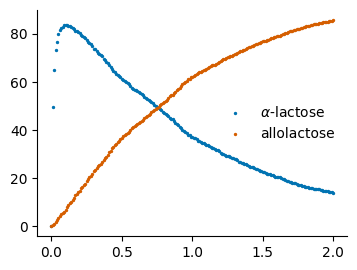

In [13]:
import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data2['avrg'], 'Alpha_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[0], 'label' : r'$\alpha$-lactose'})
simulation.plot.metabolite(data2['avrg'], 'ALLOLACTOSE', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[3], 'label' : r'allolactose'})

seaborn.despine()

In [14]:
atlas.get_rule(model, 'RXN_17755')

Rule('RXN_17755', prot(name='lacY', loc='mem') + met(name='PROTON', loc='per', prot=None) + met(name='CPD_3801', loc='per', prot=None) | prot(name='lacY', loc='mem') + met(name='PROTON', loc='cyt', prot=None) + met(name='CPD_3801', loc='cyt', prot=None), fwd_RXN_17755, rvs_RXN_17755)

In [15]:
model = atlas.replace_rule(model, 'RXN_17755', 
    "Rule('RXN_17755', prot(name='lacY', loc='mem') + met(name='PROTON', loc='per', prot=None) + met(name='CPD_3801', loc='per', prot=None) | prot(name='lacY', loc='mem') + met(name='PROTON', loc='cyt', prot=None) + met(name='CPD_3801', loc='cyt', prot=None), fwd_RXN_17755, rvs_RXN_17755)")

In [16]:
data1 = simulation.ode(model, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 2, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model, start = 0, finish = 2, points = 200, n_runs = 20, path = kasim)

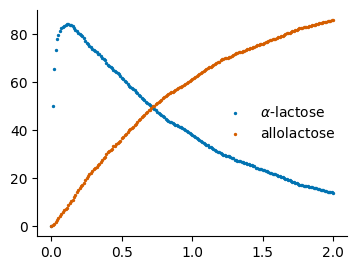

In [17]:
import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data2['avrg'], 'Alpha_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[0], 'label' : r'$\alpha$-lactose'})
simulation.plot.metabolite(data2['avrg'], 'ALLOLACTOSE', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[3], 'label' : r'allolactose'})

seaborn.despine()

In [18]:
model = atlas.replace_parameter(model, 't0_met_Alpha_lactose_per', 200)

In [19]:
data1 = simulation.ode(model, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 2, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model, start = 0, finish = 2, points = 200, n_runs = 20, path = kasim)

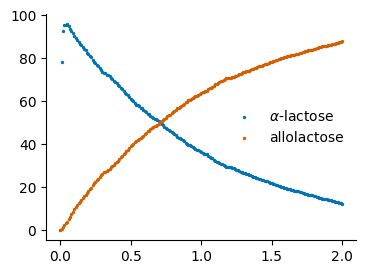

In [20]:
import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data2['avrg'], 'Alpha_lactose', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[0], 'label' : r'$\alpha$-lactose'})
simulation.plot.metabolite(data2['avrg'], 'ALLOLACTOSE', 'cyt', **{'kind' : 'scatter'}, plt_kws = {'s' : 2, 'color' : palette[3], 'label' : r'allolactose'})

seaborn.despine()

In [21]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model, 'test.bngl', bng)
export.to_kappa(model, 'test.kappa')